<a href="https://colab.research.google.com/github/berkezkul/HousingPricePrediction--Mining_and_Machine-Learning/blob/main/HousingPricePrediction_Istanbul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor   #çok değişkenli aykırı değer yakalama
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [138]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [139]:
def load():
    data = pd.read_csv("/content/final_datas.csv")
    return data

In [140]:
df = load()

In [141]:
df.head(20)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,room_and_hall_number,gross_and_net_m2,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,in_this_site,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged
0,"""2799900",137998-55,14.05.2024,Satılık,Daire,Daire,2 + 1,125 m2\n/ 105 m2,2. Kat,3 Yaşında,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250 TL,Evet,"Güney, Doğu",20.000 TL,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""1624000",132292-719,14.05.2024,Satılık,Daire,Daire,2 + 1,98 m2\n/ 91 m2,4. Kat,10 Yaşında,Kombi,20 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Evet (Site Adı Belirtilmemiş),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""10000000",4369-39466,2.05.2024,Satılık,Daire,NaN,3 + 1,175 m2\n/ 160 m2,1. Kat,11 Yaşında,Kombi,8 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,Beş Yıldız Serena Evleri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""11000000",4369-39353,2.05.2024,Satılık,Daire,NaN,3 + 1,168 m2\n/ 152 m2,1. Kat,16 Yaşında,Kombi,9 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,3.35 TL,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,Ağaoğlu My Town Sitesi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""3885000",135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,4 + 2,280 m2\n/ 250 m2,Ara Kat,Sıfır Bina,Kombi,5 Katlı,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"""2460000",135879-14,14.05.2024,Satılık,Daire,NaN,2 + 1,140 m2\n/ 120 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"""1699000",132267-324,14.05.2024,Satılık,Daire,Daire,2 + 1,120 m2\n/ 108 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,Güney,NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"""110000",98015-1975,14.05.2024,Kiralık,Residence,Daire,3 + 1,250 m2\n/ 200 m2,17. Kat,15 Yaşında,Merkezi (Pay Ölçer),50 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"""150000",98015-1979,14.05.2024,Kiralık,Residence,Daire,4 + 1,302 m2\n/ 225 m2,20. Kat,20 Yaşında,Merkezi (Pay Ölçer),27 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"""140000",98015-2005,14.05.2024,Kiralık,Residence,Daire,3 + 1,286 m2\n/ 180 m2,5. Kat,15 Yaşında,Kombi,35 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Selenium Twins Residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
def get_column_info(df, columns_of_interest):
    """
     Her değişken içindeki kaç sınıf olduğunu ve sınıfların kaçar tane veri barındırdığını görmek için kullanacağız.

    """
    column_info = {}
    for col in columns_of_interest:
        nunique = df[col].nunique()
        value_counts = df[col].value_counts()
        column_info[col] = {
            "unique_value_count": nunique,
            "value_counts": value_counts.to_dict()
        }
    return column_info

In [143]:
get_column_info(df, ['which_that_floor', 'building_age', 'floor_number'])

{'which_that_floor': {'unique_value_count': 36,
  'value_counts': {'2. Kat': 1015,
   '1. Kat': 841,
   '3. Kat': 812,
   '4. Kat': 776,
   'Bahçe Katı': 553,
   'Yüksek Giriş': 517,
   'Ara Kat': 492,
   '5. Kat': 441,
   '6. Kat': 261,
   'Giriş Katı': 252,
   'En Üst Kat': 237,
   '7. Kat': 189,
   '8. Kat': 175,
   '9. Kat': 114,
   '21 ve üzeri': 103,
   'Çatı Katı': 93,
   '10. Kat': 87,
   'Kot 1': 81,
   '11. Kat': 65,
   '12. Kat': 46,
   'Zemin': 40,
   '14. Kat': 34,
   'Yarı Bodrum': 34,
   '15. Kat': 32,
   '13. Kat': 32,
   'Kot 2': 31,
   'Teras Katı': 27,
   '16. Kat': 26,
   '17. Kat': 22,
   '18. Kat': 19,
   'Bodrum ve Zemin': 16,
   'Kot 3': 15,
   '20. Kat': 14,
   'Bodrum': 13,
   '19. Kat': 13,
   'Villa Katı': 13}},
 'building_age': {'unique_value_count': 72,
  'value_counts': {'Sıfır Bina': 1401,
   '5 Yaşında': 667,
   '30 Yaşında': 456,
   '4 Yaşında': 374,
   '25 Yaşında': 336,
   '10 Yaşında': 318,
   '35 Yaşında': 305,
   '15 Yaşında': 271,
   '40 Yaşında'

Verimizdeki bina yaşı (3 Yaşında), kat sayısı (4 Katlı) gibi aslında sayısal olan ama text olarak yazılan değişkenleri veya içerisinde 2 bilgi barındıran net brüt m2 (120/110 m2), oda salon sayısı (2+1) gibi değişkenleri dönüştürme işlemlerini yapacağız.

In [144]:
def pre_cleaning(df):

  df['price'] = df['price'].str.replace('"', '').astype(int)
  df['dues'] = df['dues'].str.replace(' TL', '').str.replace('.', '').astype(float)
  df['deposit'] = df['deposit'].str.replace(' TL', '').str.replace('.', '').astype(float)
  df['rental_income'] = df['rental_income'].str.replace(' TL', '').str.replace('.', '').astype(float)


  df['floor_number'] = df['floor_number'].str.replace(' Katlı', '').str.replace('.', '').astype(float)

  df['gross_m2'] = df['gross_and_net_m2'].str.extract(r'(\d+)\s*m2').astype(float)
  df['net_m2'] = df['gross_and_net_m2'].str.extract(r'/\s*(\d+)\s*m2').astype(float)

  df[['room_num', 'hall_num']] = df['room_and_hall_number'].str.split('+', expand=True)
  df['room_num'] = df['room_num'].astype(float)
  df['hall_num'] = df['hall_num'].astype(float)

  #3 Yaşında yerine veya Sıfır Bina yerine integer olarak ele aldık.
  df['building_age'] = df['building_age'].str.replace(' Yaşında', '')
  df['building_age'] = df['building_age'].replace('Sıfır Bina', '0')
  df['building_age' ] = df['building_age'].astype(int)

  #2.Kat vs yerine integer kısmı aldık.
  df['which_that_floor'] = df['which_that_floor'].str.replace('. Kat', '')
  df['which_that_floor'] = df.apply(lambda row: 0 if row['which_that_floor'] in ['Giriş', 'Giriş Kat', 'Yüksek Giriş', 'Bodrum', 'Yarı Bodrum', 'Zemin', 'Bahçe Katı' 'Kot 1', 'Kot 2', 'Kot 3'] else row['which_that_floor'], axis=1)
  df['which_that_floor'] = df.apply(lambda row: int(row['floor_number']) if row['which_that_floor'] in ['En Üst Kat', 'Çatı Katı', 'Teras Katı', 'Villa Katı'] else row['which_that_floor'], axis=1)
  df['which_that_floor'] = df.apply(lambda row: int(float(row['floor_number']) / 2) if row['which_that_floor'] == 'Ara Kat' else row['which_that_floor'], axis=1)

  df['which_that_floor'].fillna(int(df['floor_number'].mean()), inplace=True)
  mean_floor = int(df['floor_number'].mean(skipna=True))
  df['which_that_floor'] = df['which_that_floor'].apply(
      lambda x: mean_floor if not str(x).isdigit() else x
  )
  df['which_that_floor'] = df['which_that_floor'].astype(int)

  # Site içerisinde olup olmadığını belirleyen yeni bir sütun oluşturduk ve site isimlerini yeni sütuna yazdık.
  df['in_site'] = df['in_this_site'].notna().astype(int)
  df['site_name'] = df['in_this_site'].where(df['in_this_site'].notna(), 'No Site')

  #drop etme
  df.drop(columns=['room_and_hall_number', 'gross_and_net_m2', 'in_this_site'], inplace=True)

  return df

In [145]:
df = pre_cleaning(df)

In [146]:
df.head()

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,Evet,"Güney, Doğu",20000.000,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000,105.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.000,91.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,NaN,1,11,Kombi,8.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000,160.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,NaN,1,16,Kombi,9.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,335.000,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000,152.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.000,250.000,NaN,NaN,NaN,NaN,NaN,4.000,2.000,0,No Site


Günlük kiralık olanları ayrı bir dataframe'e kiralık olanları da başka bir dataframe'e atadık.

In [147]:
def seperate_houses(df):
  #Günlük kiralık olanların df (daily_rental_df)
  daily_rental_df = df[df['advert_state'].isnull()]

  # Kiralık olanların df (rental_df)
  rental_df = df[df['advert_state'] == 'Kiralık']

  # Orijinal dataframe'den günlük kiralık olanları ve kiralık olanları çıkardık. Sadece satılıklar kaldı.
  df = df[~df['advert_state'].isnull() & (df['advert_state'] != 'Kiralık')]

  #Her birini ayrı csv lere kaydettik.
  daily_rental_df.to_csv('daily_rental_data.csv', index=False)
  rental_df.to_csv('rental_data.csv', index=False)
  df.to_csv('updated_main_data.csv', index=False)

  return daily_rental_df, rental_df, df

In [148]:
daily_rental_df, rental_df, df = seperate_houses(df)

**MISSING VALUES**

---



In [112]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [113]:
missing_values_table(df, True)

                                n_miss   ratio
entertainment_arranged            5602 100.000
deposit                           5602 100.000
pets_allowed                      5602 100.000
video_calling                     5602 100.000
single_bed_number                 5602 100.000
double_beds_number                5602 100.000
room_number                       5602 100.000
period                            5602 100.000
invoices_included_in_the_price    5596  99.890
cleaning_fee                      5594  99.860
guests_number                     5594  99.860
halls_number                      5594  99.860
rental_income                     3411  60.890
dues                              3314  59.160
authorized_office                 2049  36.580
structure_type                    1594  28.450
structure_status                  1468  26.200
fuel_type                         1276  22.780
housing_shape                     1233  22.010
facade                            1023  18.260
swap         

['housing_shape',
 'credit_elegibility',
 'furniture_status',
 'bath_number',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'dues',
 'swap',
 'facade',
 'rental_income',
 'fuel_type',
 'authorized_office',
 'deposit',
 'period',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'guests_number',
 'net_m2',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged']

Eksik değerleri doldurmadan önce değişkenlerimizin neler olduğunu, nasıl yaklaşmamız gerektiğini inceledik.

Kategorik, numerik, kategorik gözüken ama numerik olan değişkenlerin tespitini yaptık.

In [114]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Notes
    ------

        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        (Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.)
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [115]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 5602
Variables: 41
cat_cols: 27
num_cols: 11
cat_but_car: 3
num_but_cat: 6


In [116]:
cat_cols

['advert_state',
 'house_type',
 'housing_shape',
 'heating_type',
 'credit_elegibility',
 'furniture_status',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'swap',
 'facade',
 'fuel_type',
 'authorized_office',
 'period',
 'guests_number',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged',
 'deposit',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'in_site']

In [117]:
num_cols

['price',
 'which_that_floor',
 'building_age',
 'floor_number',
 'bath_number',
 'dues',
 'rental_income',
 'gross_m2',
 'net_m2',
 'room_num',
 'hall_num']

In [118]:
cat_but_car

['advert_id', 'last_update_date', 'site_name']

 Bazı sınıflar oldukça düşük frekansa sahipler. Burda bazı sınıfları bir araya getirerek yeni kategoriler ortaya çıkartabiliriz.


Düşük Frekanslı Değerlere Yaklaşım

In [119]:
get_column_info(df, cat_cols)

{'advert_state': {'unique_value_count': 1, 'value_counts': {'Satılık': 5602}},
 'house_type': {'unique_value_count': 12,
  'value_counts': {'Daire': 5006,
   'Villa': 291,
   'Residence': 147,
   'Müstakil Ev': 77,
   'Bina': 44,
   'Yalı': 13,
   'Yazlık': 8,
   'Köşk': 6,
   'Çiftlik Evi': 5,
   'Yalı Dairesi': 3,
   'Bungalov': 1,
   'Prefabrik': 1}},
 'housing_shape': {'unique_value_count': 12,
  'value_counts': {'Daire': 3382,
   'Çatı Dubleksi': 234,
   'Dubleks': 195,
   'Bahçe Katı': 186,
   'Müstakil Ev': 141,
   'Tripleks': 88,
   'Bahçe Dubleksi': 51,
   'Fourlex': 35,
   'Ara Kat Dubleks': 26,
   'Ters Dubleks': 24,
   'İkiz Ev': 6,
   '1': 1}},
 'heating_type': {'unique_value_count': 14,
  'value_counts': {'Kombi': 4126,
   'Merkezi (Pay Ölçer)': 762,
   'Merkezi': 406,
   'Yerden Isıtma': 162,
   'Kat Kaloriferi': 47,
   'Klima': 25,
   'Soba': 18,
   'Isıtma Yok': 17,
   'Doğalgaz Sobası': 14,
   'VRV': 8,
   'Fancoil Ünitesi': 7,
   'Belirtilmemiş': 6,
   'Güneş Enerjis

In [120]:
def simplify_low_frequency_classes(df):

    def simplify_housing_shape(shape):
        if shape in ['Daire', 'Bahçe Katı']:
            return 'Apartment'
        elif shape in ['Müstakil Ev', 'İkiz Ev']:
            return 'Detached House'
        elif shape in ['Çatı Dubleksi', 'Dubleks', 'Ters Dubleks', 'Bahçe Dubleksi', 'Ara Kat Dubleks']:
            return 'Duplex'
        else:
            return 'Other'

    df.loc[:, 'housing_shape'] = df['housing_shape'].apply(simplify_housing_shape)

    def simplify_heating_type(heating):
        if heating in ['Merkezi (Pay Ölçer)', 'Merkezi']:
            return 'Central Heating'
        elif heating in ['Kombi']:
            return 'Kombi'
        elif heating in ['Yerden Isıtma']:
            return 'Floor/Fireplace Heating'
        elif heating in ['Soba', 'Doğalgaz Sobası']:
            return 'Soba'
        else:
            return 'Other'

    df.loc[:, 'heating_type'] = df['heating_type'].apply(simplify_heating_type)

    # other low-frequency class handling
    def simplify_class(column, frequent_classes):
        df.loc[:, column] = df[column].apply(lambda x: x if pd.isnull(x) or x in frequent_classes else 'Other')

    # house_type
    df.loc[:, 'house_type'] = df['house_type'].apply(lambda x: x if x in ['Daire', 'Villa', 'Residence', 'Müstakil Ev'] else 'Other')

    # structure_type
    frequent_structure_types = ['Betonarme']
    simplify_class('structure_type', frequent_structure_types)

    # fuel_type
    frequent_fuel_types = ['Doğalgaz', 'Elektrik']
    simplify_class('fuel_type', frequent_fuel_types)

    # hall_num
    df.loc[:, 'hall_num'] = df['hall_num'].apply(lambda x: x if x in [0.0, 1.0, 2.0] else '3+')

    # room_num
    df.loc[:, 'room_num'] = df['room_num'].apply(lambda x: x if x in [1.0, 2.0, 3.0, 4.0, 5.0] else '6+')

    return df

In [121]:
get_column_info(df, cat_cols)

{'advert_state': {'unique_value_count': 1, 'value_counts': {'Satılık': 5602}},
 'house_type': {'unique_value_count': 12,
  'value_counts': {'Daire': 5006,
   'Villa': 291,
   'Residence': 147,
   'Müstakil Ev': 77,
   'Bina': 44,
   'Yalı': 13,
   'Yazlık': 8,
   'Köşk': 6,
   'Çiftlik Evi': 5,
   'Yalı Dairesi': 3,
   'Bungalov': 1,
   'Prefabrik': 1}},
 'housing_shape': {'unique_value_count': 12,
  'value_counts': {'Daire': 3382,
   'Çatı Dubleksi': 234,
   'Dubleks': 195,
   'Bahçe Katı': 186,
   'Müstakil Ev': 141,
   'Tripleks': 88,
   'Bahçe Dubleksi': 51,
   'Fourlex': 35,
   'Ara Kat Dubleks': 26,
   'Ters Dubleks': 24,
   'İkiz Ev': 6,
   '1': 1}},
 'heating_type': {'unique_value_count': 14,
  'value_counts': {'Kombi': 4126,
   'Merkezi (Pay Ölçer)': 762,
   'Merkezi': 406,
   'Yerden Isıtma': 162,
   'Kat Kaloriferi': 47,
   'Klima': 25,
   'Soba': 18,
   'Isıtma Yok': 17,
   'Doğalgaz Sobası': 14,
   'VRV': 8,
   'Fancoil Ünitesi': 7,
   'Belirtilmemiş': 6,
   'Güneş Enerjis

**OUTLIERS**

---


Aykırı değerleri tespit edip baskılayacağız.

In [122]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

**TRANSFORMING**

---



In [123]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [124]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe.loc[:, binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [126]:
def pre_processing(df):

  cat_cols, num_cols, cat_but_car = grab_col_names(df)


  # %95'dan fazla eksik değeri olan sütunları kaldırdık.
  threshold = 0.95
  df = df[df.columns[df.isnull().mean() < threshold]]

  '''MISSING VALUES'''

  cat_cols, num_cols, cat_but_car = grab_col_names(df)

  # Kategorik değişkenleri mod ile, sayısal değişkenleri median ile doldurduk.
  for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

  for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())


  '''OUTLIERS'''
  for col in num_cols:
    replace_with_thresholds(df, col)


  '''TRANSFORMING'''

  # label encoding
  binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
  for col in binary_cols:
    df = label_encoder(df, col)

  #one hot encoding
  ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 and col not in num_cols]
  df = one_hot_encoder(df, ohe_cols, drop_first=True)

  #multi label değişken olan facade'de one hot encoding:

  facade_dummies = df['facade'].str.get_dummies(sep=', ')
  facade_dummies.columns = ['facade_' + col.lower() for col in facade_dummies.columns]
  df = pd.concat([df, facade_dummies], axis=1)
  df.drop(columns=['facade'], inplace=True)
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

  # hepsi satılık olduğu için advert_state i, tek bir değer barındırdığı için authorized_office i ve kategorik olsa da çok fazla sınıf
  # bulunduğu için anlam ifade etmeyen(cat_but_car = ['advert_id', ''last_update_date', 'site_name']) değişkenleri çıkarttık.
  df.drop(columns=['advert_state', 'authorized_office'], inplace=True)
  df.drop(columns=cat_but_car, inplace=True)

  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  num_cols = [col for col in num_cols if col != 'price']

  '''NORMALIZATION'''

  X_scaled = StandardScaler().fit_transform(df[num_cols])
  df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

  y = df["price"]
  X = df.drop(["price"], axis=1)


  for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

  for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())

  '''
  # NaN kontrolü
  if X.isnull().values.any():
    print("NaN values found in X after pre-processing!")
  else:
    print("No NaN values in X after pre-processing.")
  '''
  #print(df.isnull().sum())

  return df, X, y, X_scaled

In [127]:
def evaluate_models(df, X_scaled, y, target_col='price'):
    # Model listesi
    model_list = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        SVR(),
        KNeighborsRegressor(),
        XGBRegressor(),
        LGBMRegressor()
    ]

    model_name_list = []
    r2_score_list = []


    # Modellerin cross validation ile değerlendirilmesi
    for model in model_list:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        model_name_list.append(model.__class__.__name__)
        r2_score_list.append(r2_score(y_test, y_pred))


        print(f"{model.__class__.__name__} R2 score: {r2_score(y_test, y_pred)}")
        print("-" * 50)


    results_df = pd.DataFrame({
        'Model': model_name_list,
        'R2 Score': r2_score_list})


    plt.figure(figsize=(10, 6))
    sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')
    plt.title('Model Performance Comparison (R2 Score)')
    plt.xlabel('R2 Score')
    plt.ylabel('Model')
    plt.show()


    return results_df

In [128]:
def model_and_train(df, X_scaled, y, target_col='price'):

    param_grids = {
        'RandomForestRegressor': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20]
        },
        'GradientBoostingRegressor': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 8],
            'n_estimators': [100, 200]
        },
        'AdaBoostRegressor': {
            'n_estimators': [50, 100, 200]
        },
        'XGBRegressor': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 8],
            'n_estimators': [100, 200]
        },
        'LGBMRegressor': {
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200],
            'colsample_bytree': [0.7, 1]
        }
    }

    model_list = [
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        XGBRegressor(),
        LGBMRegressor()
    ]

    model_results = []

    for model in model_list:
        model_name = model.__class__.__name__
        params = param_grids[model_name]

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        grid_search = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"{model_name} Best Params: {grid_search.best_params_}")
        print(f"{model_name} R2 Score: {r2}")
        print(f"{model_name} MSE: {mse}")
        print(f"{model_name} MAE: {mae}")
        print("-" * 50)

        model_results.append({
            'model': model_name,
            'best_params': grid_search.best_params_,
            'r2_score': r2,
            'mse': mse,
            'mae': mae,
            'best_model': best_model
        })

    return model_results


In [129]:
def visualize_results(model_results, X_test, y_test):
    for result in model_results:
        best_model = result['best_model']
        y_pred = best_model.predict(X_test)

        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')
        plt.xlabel('Gerçek Fiyatlar')
        plt.ylabel('Tahmin Edilen Fiyatlar')
        plt.title(f"{result['model']} Tahmin Performansı")
        plt.show()

**MACHINE LEARNING PIPELINE**

---



FOR SALE

In [130]:
def main():

  df = load()

  '''DATA PREPROCESSING'''
  df = pre_cleaning(df)
  daily_rental_df, rental_df, df = seperate_houses(df)
  df = simplify_low_frequency_classes(df)
  df, X, y, X_scaled = pre_processing(df)

  '''MODEL'''
  results_df = evaluate_models(df, X_scaled, y)
  print(results_df)

  model_results = model_and_train(df, X_scaled, y)
  print(model_results)

  # Eğitim ve test setlerinin oluşturulması
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  # Sonuçların görselleştirilmesi
  visualize_results(model_results, X_test, y_test)

  return df, X, y, model_results

Observations: 5602
Variables: 41
cat_cols: 29
num_cols: 9
cat_but_car: 3
num_but_cat: 6
Observations: 5602
Variables: 29
cat_cols: 17
num_cols: 9
cat_but_car: 3
num_but_cat: 1
Observations: 5602
Variables: 48
cat_cols: 42
num_cols: 6
cat_but_car: 0
num_but_cat: 42
LinearRegression R2 score: 0.4544951238061796
--------------------------------------------------
Ridge R2 score: 0.4544622554549246
--------------------------------------------------
Lasso R2 score: 0.4544951515277531
--------------------------------------------------
ElasticNet R2 score: 0.426688819289763
--------------------------------------------------
DecisionTreeRegressor R2 score: 0.47294514981395275
--------------------------------------------------
RandomForestRegressor R2 score: 0.6313361777850854
--------------------------------------------------
GradientBoostingRegressor R2 score: 0.543671943342517
--------------------------------------------------
AdaBoostRegressor R2 score: 0.41119640410556557
------------------

<ipython-input-91-417e5c95a8a0>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')


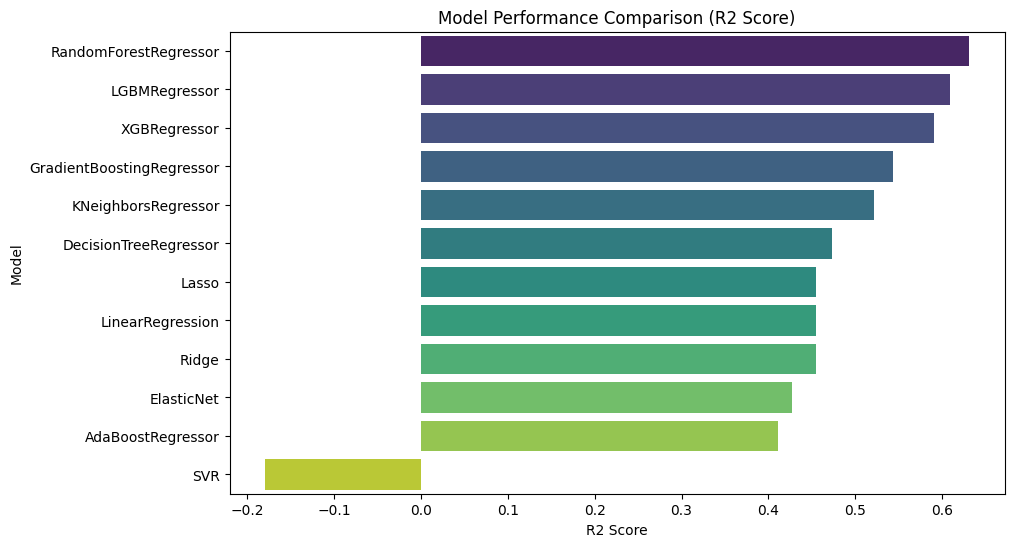

                        Model  R2 Score
0            LinearRegression     0.454
1                       Ridge     0.454
2                       Lasso     0.454
3                  ElasticNet     0.427
4       DecisionTreeRegressor     0.473
5       RandomForestRegressor     0.631
6   GradientBoostingRegressor     0.544
7           AdaBoostRegressor     0.411
8                         SVR    -0.180
9         KNeighborsRegressor     0.522
10               XGBRegressor     0.591
11              LGBMRegressor     0.609
RandomForestRegressor Best Params: {'max_depth': None, 'n_estimators': 300}
RandomForestRegressor R2 Score: 0.6326930871154828
RandomForestRegressor MSE: 16681808147997.51
RandomForestRegressor MAE: 2625768.2926055207
--------------------------------------------------
GradientBoostingRegressor Best Params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
GradientBoostingRegressor R2 Score: 0.6037790165117579
GradientBoostingRegressor MSE: 17994985117091.59
Gradient

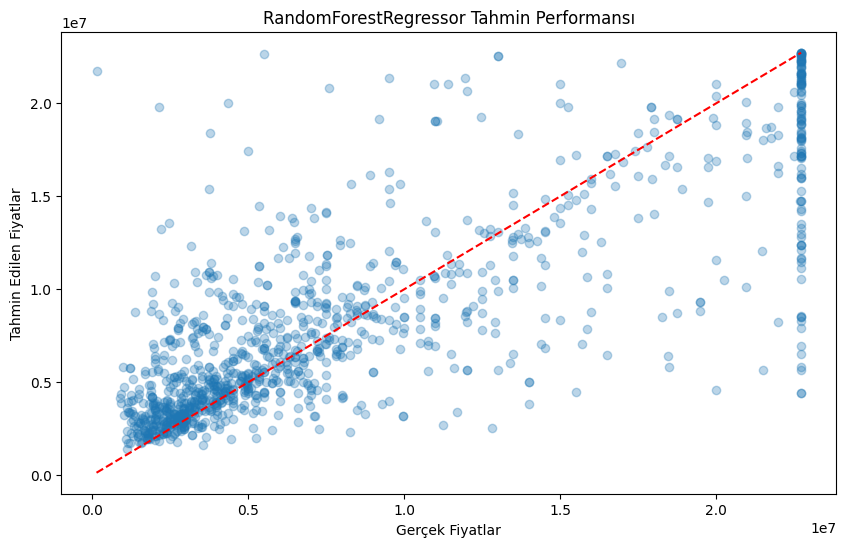

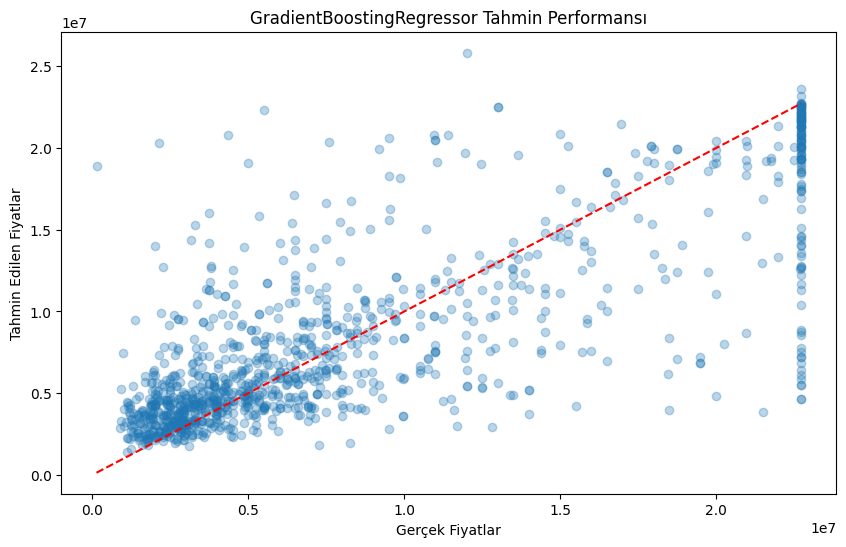

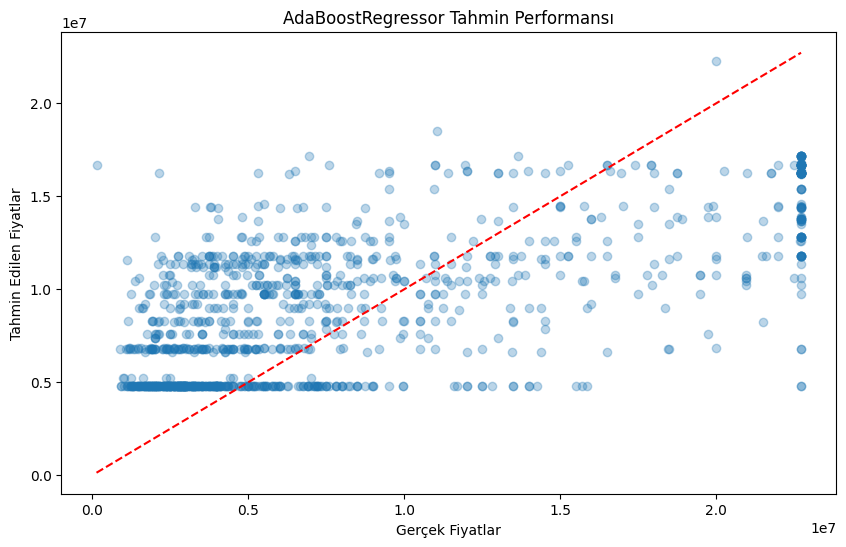

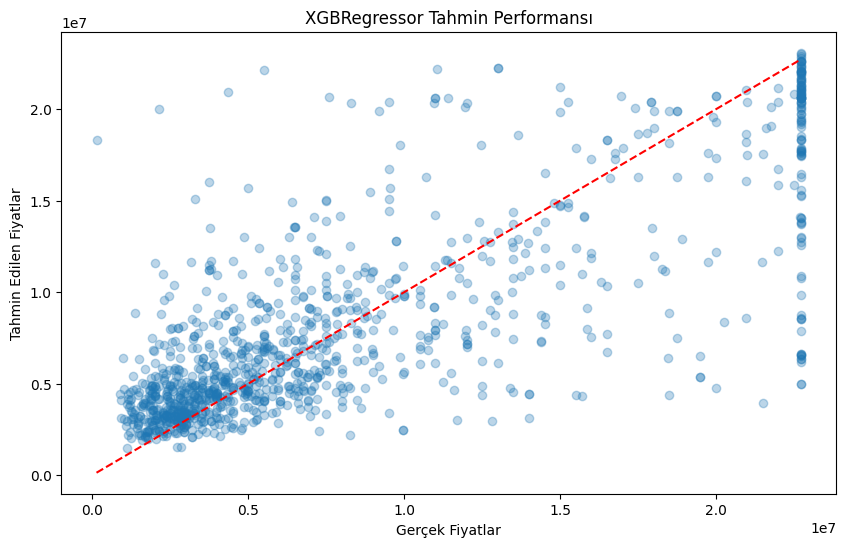

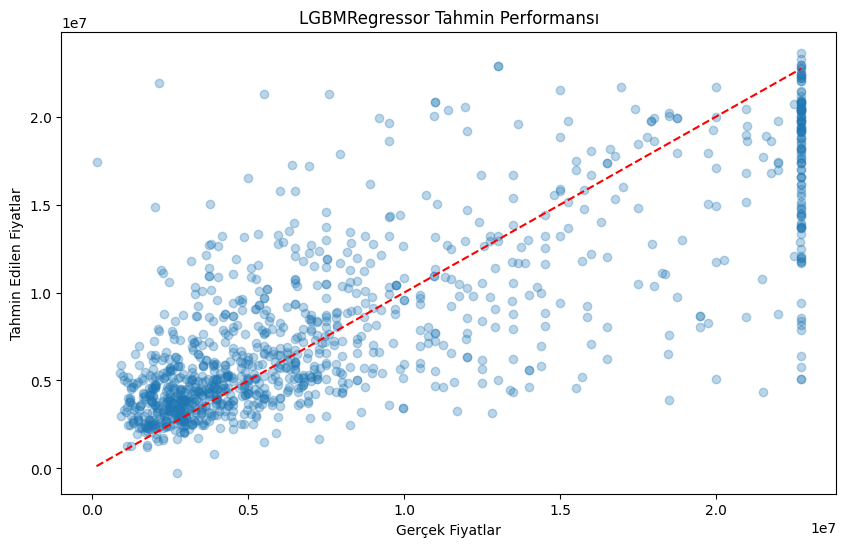

In [95]:
df,X,y, model_results = main()

FOR RENTAL HOUSE

In [135]:
def rental_main():

  df = load()

  '''DATA PREPROCESSING'''
  df = pre_cleaning(df)
  daily_rental_df, rental_df, df = seperate_houses(df)
  rental_df = simplify_low_frequency_classes(rental_df)
  rental_df, X, y, X_scaled = pre_processing(rental_df)

  '''MODEL'''
  results_df = evaluate_models(rental_df, X_scaled, y)
  print(results_df)

  model_results = model_and_train(rental_df, X_scaled, y)
  print(model_results)

  # Eğitim ve test setlerinin oluşturulması
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  # Sonuçların görselleştirilmesi
  visualize_results(model_results, X_test, y_test)

  return rental_df, X, y, model_results

Observations: 2287
Variables: 41
cat_cols: 30
num_cols: 8
cat_but_car: 3
num_but_cat: 7
Observations: 2287
Variables: 27
cat_cols: 16
num_cols: 8
cat_but_car: 3
num_but_cat: 2
Observations: 2287
Variables: 47
cat_cols: 41
num_cols: 6
cat_but_car: 0
num_but_cat: 40
LinearRegression R2 score: 0.514999870382711
--------------------------------------------------
Ridge R2 score: 0.5155947032899181
--------------------------------------------------
Lasso R2 score: 0.5150697736435703
--------------------------------------------------
ElasticNet R2 score: 0.4924733595454467
--------------------------------------------------
DecisionTreeRegressor R2 score: 0.5059457879007752
--------------------------------------------------
RandomForestRegressor R2 score: 0.7109704624342064
--------------------------------------------------
GradientBoostingRegressor R2 score: 0.6288510635430141
--------------------------------------------------
AdaBoostRegressor R2 score: 0.5159433194193815
-------------------

<ipython-input-127-417e5c95a8a0>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')


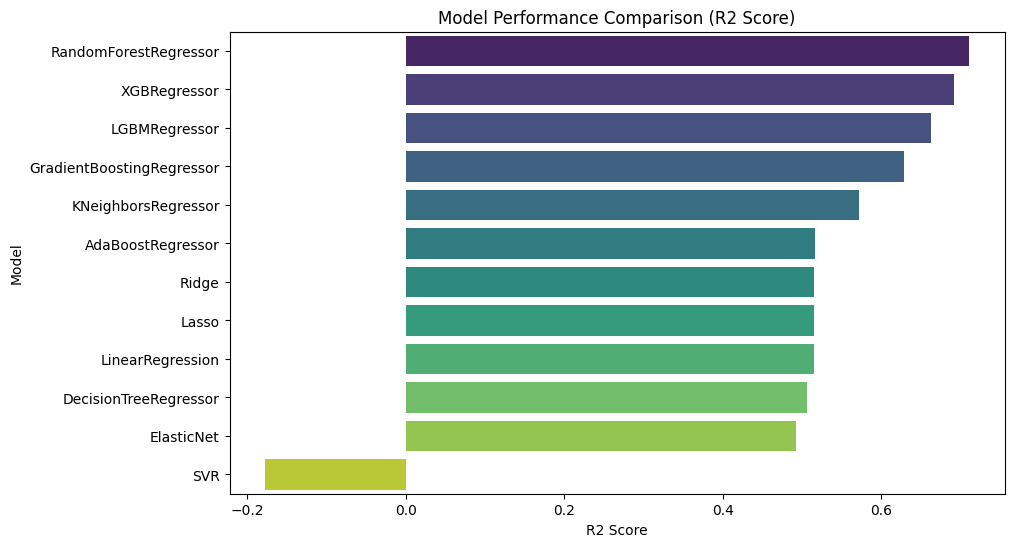

                        Model  R2 Score
0            LinearRegression     0.515
1                       Ridge     0.516
2                       Lasso     0.515
3                  ElasticNet     0.492
4       DecisionTreeRegressor     0.506
5       RandomForestRegressor     0.711
6   GradientBoostingRegressor     0.629
7           AdaBoostRegressor     0.516
8                         SVR    -0.178
9         KNeighborsRegressor     0.572
10               XGBRegressor     0.692
11              LGBMRegressor     0.662
RandomForestRegressor Best Params: {'max_depth': 10, 'n_estimators': 200}
RandomForestRegressor R2 Score: 0.6904714269784462
RandomForestRegressor MSE: 143576556.64875218
RandomForestRegressor MAE: 8206.143196377738
--------------------------------------------------
GradientBoostingRegressor Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
GradientBoostingRegressor R2 Score: 0.6286531738855341
GradientBoostingRegressor MSE: 172251298.46815553
GradientB

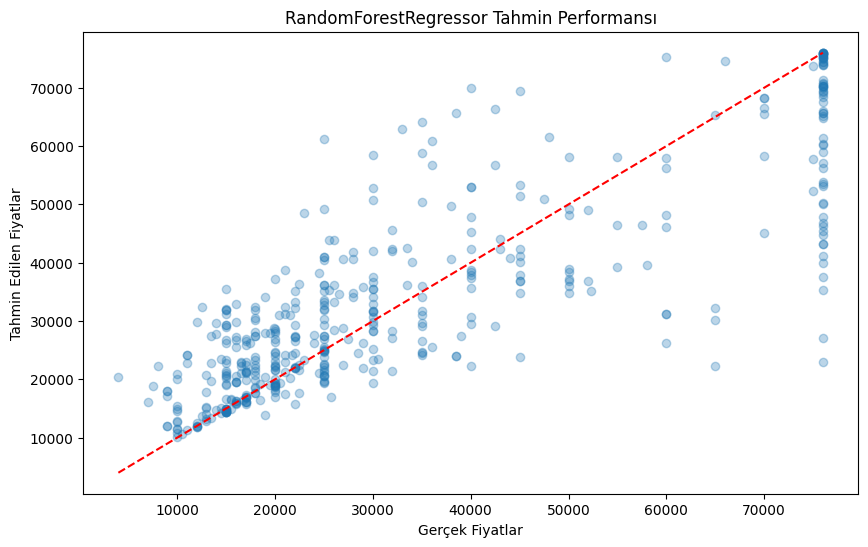

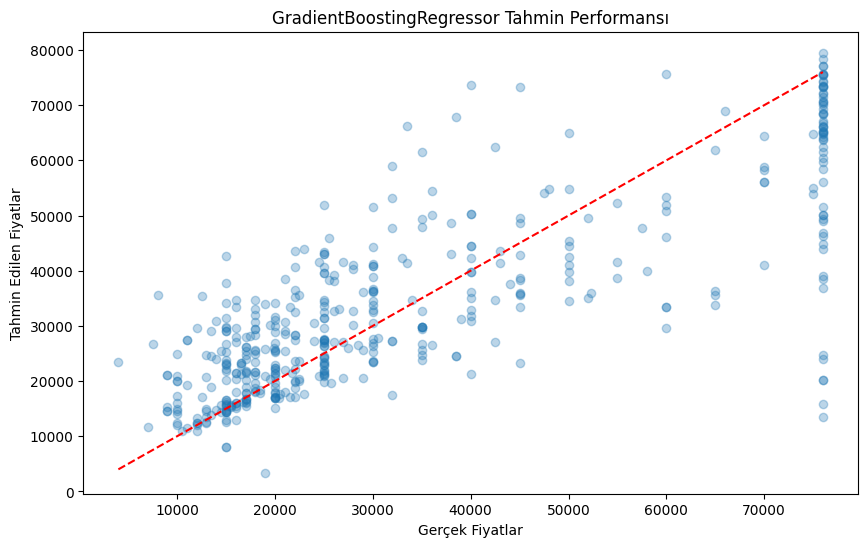

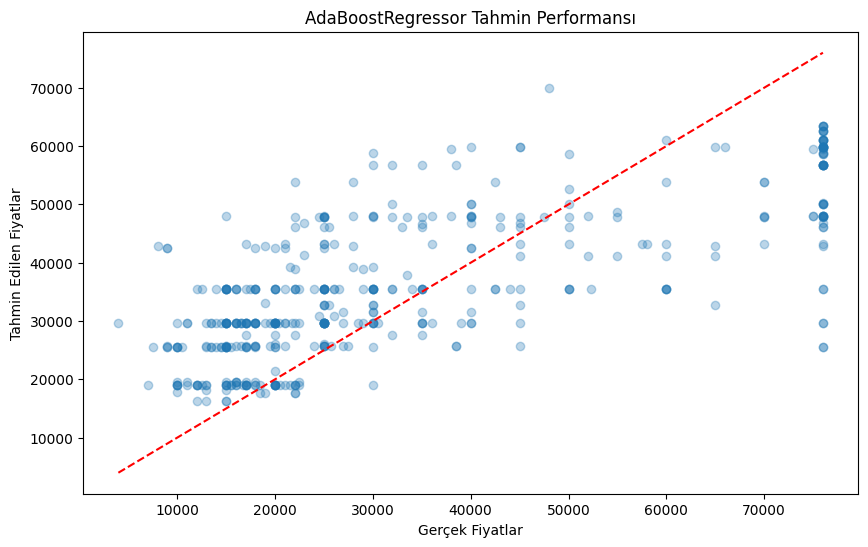

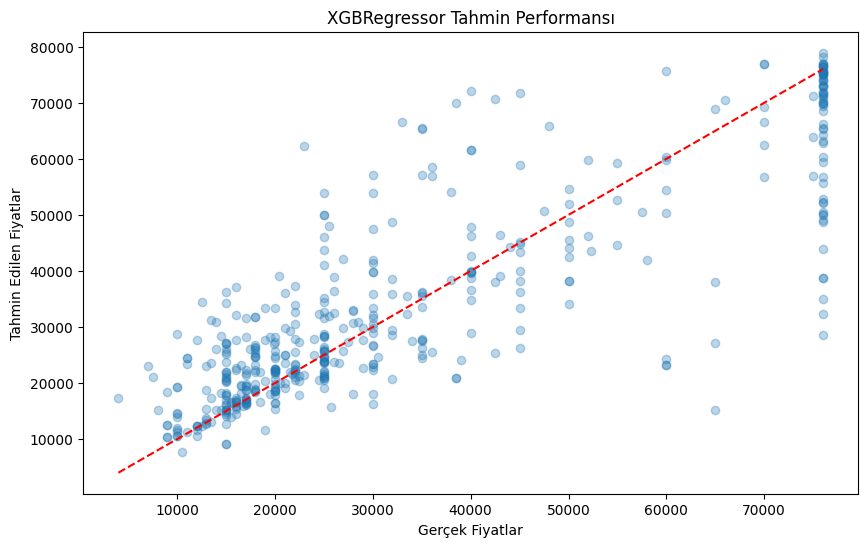

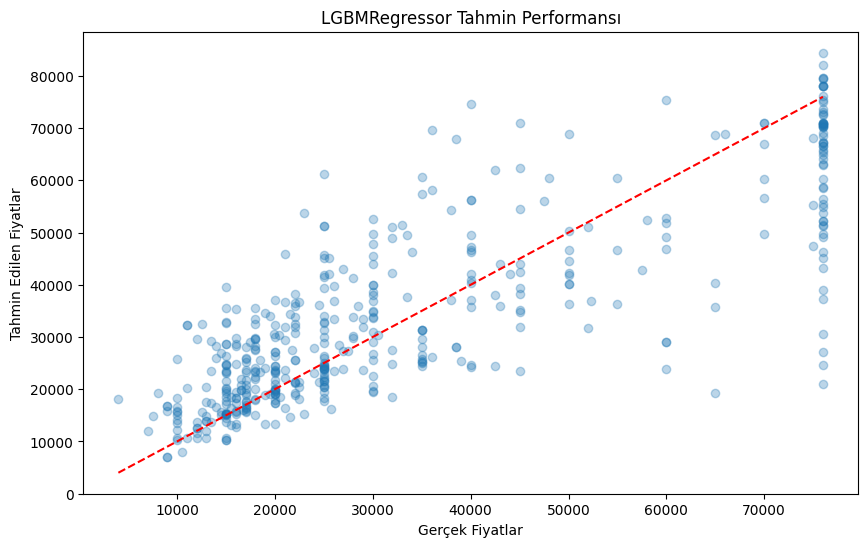

In [136]:
rental_df,X,y, model_results = rental_main()